# Setup

In [1]:
from joblib import dump, load
import numpy as np
from numpy import nan
from pprint import pprint
import matplotlib.pyplot as plt
import tldextract

# Load imputer, scalar and model

In [2]:
#imp = load('finalized_imputer.joblib')
scaler = load('./model/apwg_scaler.joblib')
model = load('./model/apwg_model.joblib')

# Load domains used in training

In [3]:
with open("data/data_cluster_5744", "r", encoding='utf-8') as f:
    data_train = eval(f.read())

In [4]:
domain_train = set([d['info'][1] for d in data_train])
len(domain_train)

5744

# Load phishing database

In [5]:
with open("/home/sophie/SSRG/domainclassification/results/dataset/domain_target_55383", "r", encoding='utf-8') as f:
    data = eval(f.read())
    
#random.Random(4).shuffle(data)
    
datasets = set([d['dataset'] for d in data])
pprint(datasets)

{'comp-deltaphish',
 'comp-phishlabs',
 'mal-apwg',
 'mal-future-apwg',
 'mal-phishlabs',
 'unlabeled-apwg'}


In [6]:
#random.Random(4).shuffle(data)

#dataset_train = {'mal-apwg', 'comp-deltaphish', 'unlabeled-apwg'}
dataset_train = {'unlabeled-apwg'}

Xdb = np.array([d['feat'] for d in data if d['dataset'] in dataset_train and d['info'][1] not in domain_train])
ydb = np.array([d['target'] for d in data if d['dataset'] in dataset_train and d['info'][1] not in domain_train])
data_db = [d for d in data if d['dataset'] in dataset_train and d['info'][1] not in domain_train]

feat_labels = data_db[0]['feat_labels']
print(feat_labels)
print(len(feat_labels))

print(len(data_db))
print(Xdb.shape)
print(ydb.shape)
print(feat_labels)
pprint(Xdb[:5])
pprint(ydb[:5])
print("# compromised: ", len([tar for tar in ydb if tar==1]))
print("# malicious: ", len([tar for tar in ydb if tar==-1]))
print("# unknown: ", len([tar for tar in ydb if tar==0]))
print("% compromised: ", len([tar for tar in ydb if tar==1])/len(ydb))
print("% malicious: ", len([tar for tar in ydb if tar==-1])/len(ydb))
print("% unknown: ", len([tar for tar in ydb if tar==0])/len(ydb))

['archived', 'years_active', 'years_inactive', 'num_captures', 'freenom_tld', 'prev_mal_tld', 'wildcard_subdomain', 'reachable', 'redirected', 'blocked', 'alexa_rank', 'ratio_longest_word', 'contain_digit', 'contain_dash', 'name_len', 'brandname_partialratio', 'prev_mal_domain_ed', 'sub_levels', 'num_sub']
19
44668
(44668, 19)
(44668,)
['archived', 'years_active', 'years_inactive', 'num_captures', 'freenom_tld', 'prev_mal_tld', 'wildcard_subdomain', 'reachable', 'redirected', 'blocked', 'alexa_rank', 'ratio_longest_word', 'contain_digit', 'contain_dash', 'name_len', 'brandname_partialratio', 'prev_mal_domain_ed', 'sub_levels', 'num_sub']
array([[1.00000000e+00, 9.00000000e+00, 1.00000000e+00, 7.42000000e+02,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.14676000e+05, 3.75000000e-01,
        1.00000000e+00, 0.00000000e+00, 4.00000000e+00, 5.00000000e+01,
        2.50000000e-01, 1.00000000e+00, 8.00000000e+00],
       [0

# Normalize and Impute

In [7]:
#Xdb = imp.transform(Xdb)
Xdb = np.where(np.isnan(Xdb), -1, Xdb)
Xdb = scaler.transform(Xdb)
print(Xdb[:2])

[[ 9.27224348e-01  9.85399917e-01  9.91101380e-01  2.20487034e-01
  -1.56498547e-02 -1.00000000e+00  9.54979067e-01  5.60759520e-01
   2.88067021e-01  5.21843564e-01  4.69640683e+00  3.11252699e-01
   4.75467522e+00 -2.86101913e-01 -1.74231154e+00 -2.01450175e+00
   3.97494790e+00  1.53818755e+00  4.44751814e+00]
 [-1.07848764e+00 -6.85296388e-01 -9.78082778e-01 -4.25758027e-02
   6.38983568e+01 -1.00000000e+00 -1.04714337e+00 -1.78329563e+00
  -1.54729291e+00 -1.74299078e+00 -1.23654083e-01 -1.48599910e+00
   4.75467522e+00 -2.86101913e-01 -1.04289799e+00  4.55122873e-01
   1.15517755e+00 -4.22473486e-01 -1.62381740e-01]]


# Predict

In [8]:
ydb_pred = model.predict(Xdb)
ydb_proba = model.predict_proba(Xdb)
#print(sorted(Xpredict_proba[:,0]))

In [9]:
print("# 2nd level domains:", len(ydb_pred))
print("# compromised, hacked:", len([x for x in ydb_pred if x==1]))
print("# malicious, owned:", len([x for x in ydb_pred if x==-1]))
print("% compromised, hacked:", len([x for x in ydb_pred if x==1])/len(ydb_pred))
print("% malicious, owned:", len([x for x in ydb_pred if x==-1])/len(ydb_pred))

# 2nd level domains: 44668
# compromised, hacked: 27476
# malicious, owned: 17192
% compromised, hacked: 0.6151159666875615
% malicious, owned: 0.3848840333124384


In [13]:
print("# 2nd level domains:", len(ydb_pred))
print("# compromised, hacked:", len([x for x in ydb_pred if x==1]))
print("# malicious, owned:", len([x for x in ydb_pred if x==-1]))
print("% compromised, hacked:", len([x for x in ydb_pred if x==1])/len(ydb_pred))
print("% malicious, owned:", len([x for x in ydb_pred if x==-1])/len(ydb_pred))

# 2nd level domains: 44668
# compromised, hacked: 27476
# malicious, owned: 17192
% compromised, hacked: 0.6151159666875615
% malicious, owned: 0.3848840333124384


#### Most likely malicious

In [29]:
ydb_proba_comp = ydb_proba[:,0]
idx = np.argsort(ydb_proba_comp)
data_db_sort = np.array(data_db)[idx]
ydb_proba_sort = np.array(ydb_proba_comp)[idx]

In [30]:
for i, prob in enumerate(ydb_proba_sort[:10]):
    print(1-prob)
    print(data_db_sort[i])

0.9148238632776867
{'dataset': 'unlabeled-apwg', 'feat': [1, 9, 1, 742.0, 0, 0, 1, 1, 0, 0, 114676, 0.375, 1, 0, 4, 50, 0.25, 1, 8], 'feat_labels': ['archived', 'years_active', 'years_inactive', 'num_captures', 'freenom_tld', 'prev_mal_tld', 'wildcard_subdomain', 'reachable', 'redirected', 'blocked', 'alexa_rank', 'ratio_longest_word', 'contain_digit', 'contain_dash', 'name_len', 'brandname_partialratio', 'prev_mal_domain_ed', 'sub_levels', 'num_sub'], 'info': ['000a.biz', 'dd9487f05c914b1bdf0b5ef16c00d17f'], 'target': 0}
0.9148238632776867
{'dataset': 'unlabeled-apwg', 'feat': [1, 5, 1, 11.0, 0, 0, 1, 1, 0, 0, nan, 0.5, 0, 0, 3, 50, 0.3333333333333333, 0, 1], 'feat_labels': ['archived', 'years_active', 'years_inactive', 'num_captures', 'freenom_tld', 'prev_mal_tld', 'wildcard_subdomain', 'reachable', 'redirected', 'blocked', 'alexa_rank', 'ratio_longest_word', 'contain_digit', 'contain_dash', 'name_len', 'brandname_partialratio', 'prev_mal_domain_ed', 'sub_levels', 'num_sub'], 'info':

#### Most likely compromised

In [33]:
ydb_proba_mal = ydb_proba[:,1]
idx = np.argsort(ydb_proba_mal)
data_db_sort = np.array(data_db)[idx]
ydb_proba_sort = np.array(ydb_proba_mal)[idx]

In [34]:
for i, prob in enumerate(ydb_proba_sort[:10]):
    print(1-prob)
    print(data_db_sort[i])

0.8960721229923865
{'dataset': 'unlabeled-apwg', 'feat': [0, nan, nan, nan, 0, 1, 0, 0, nan, nan, nan, 0.25, 1, 1, 28, 80, 0.03571428571428571, 2, 1], 'feat_labels': ['archived', 'years_active', 'years_inactive', 'num_captures', 'freenom_tld', 'prev_mal_tld', 'wildcard_subdomain', 'reachable', 'redirected', 'blocked', 'alexa_rank', 'ratio_longest_word', 'contain_digit', 'contain_dash', 'name_len', 'brandname_partialratio', 'prev_mal_domain_ed', 'sub_levels', 'num_sub'], 'info': ['vacationrentalreview-g908802.top', '4e9ed79650f717ae0965a9f7176c097a'], 'target': 0}
0.8960721229923865
{'dataset': 'unlabeled-apwg', 'feat': [0, nan, nan, nan, 0, 1, 0, 0, nan, nan, nan, 0.29411764705882354, 0, 0, 13, 75, 0.07692307692307693, 15, 2], 'feat_labels': ['archived', 'years_active', 'years_inactive', 'num_captures', 'freenom_tld', 'prev_mal_tld', 'wildcard_subdomain', 'reachable', 'redirected', 'blocked', 'alexa_rank', 'ratio_longest_word', 'contain_digit', 'contain_dash', 'name_len', 'brandname_pa

# Prob analysis

In [14]:
def plotFractionalGraph(x, y, xlabel="", xmin=0, xmax=4000):
    print(y)
    print(x)

    ax = plt.subplot()
    ax.plot(x, y)

    plt.xlabel(xlabel)
    plt.ylabel("Fraction of Domains")
    #plt.axis([xmin, xmax, 0, 1])
    plt.grid(True, linestyle='dotted')

    plt.show()

In [15]:
def fractionalGraph(metric, max=100, step=5):
    cnt = 0
    fractions = [0]
    metricFractions = [0]
    while(True):
        cnt = cnt + step
        if cnt > max:
            break

        fraction = int(len(metric)*cnt/float(100))
        max_step = metric[fraction-1]
        fractions.append(cnt/float(100))
        metricFractions.append(max_step)

    plotFractionalGraph(metricFractions, fractions, xlabel="Compromised probability")

In [13]:
def plotSortedGraph(x, y=None, xlabel=""):
    ax = plt.subplot()
    ax.plot(x)

    plt.grid(True, linestyle='dotted')
    
    plt.xlabel("Number of Domains")
    plt.ylabel("Compromised probability")

    plt.show()

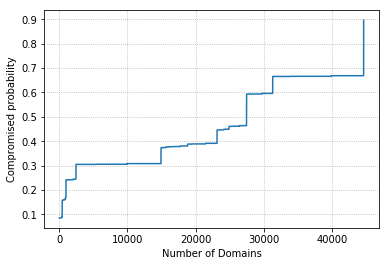

In [14]:
# distribution of probabilities
ydb_proba_sorted = sorted(ydb_proba[:,0])
plotSortedGraph(ydb_proba_sorted)

[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
[0, 0.33143633172258447, 0.33143633172258447, 0.3339278770076135, 0.3339278770076135, 0.3345076668912181, 0.40394238708529817, 0.4064339323703272, 0.5362735143359563, 0.5510938855176968, 0.60877956969867, 0.611271114983699, 0.6195889189512271, 0.6260914861654395, 0.6920949743139408, 0.6920949743139408, 0.6945865195989698, 0.6945865195989698, 0.6951663094825743, 0.7559310681310687, 0.914823863277687]


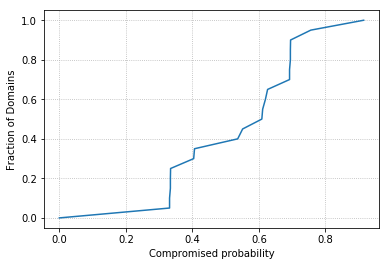

In [28]:
# distribution of probabilities
ydb_proba_sorted = sorted(ydb_proba[:,1])
fractionalGraph(ydb_proba_sorted)

In [16]:
# num domains 0.7 problable

prob = [y for y in ydb_proba[:,0] if y>0.65 or y<0.35]
len(prob)

28279

In [21]:
# num domains 0.7 problable

prob = [y for y in ydb_proba[:,0] if y>0.65 or y<0.35]
len(prob)

28279

# Process results

In [10]:
domain_target = dict()

for i, data in enumerate(data_db):
    info = data['info']
    domain = info[0]
    d_id = info[1]
    
    domain_target[domain] = ydb_pred[i]

#print(domain_target)

In [11]:
quarter = {"01": 'Q1', "02": 'Q1',"03": 'Q1', "04": 'Q2', "05": 'Q2', "06": 'Q2', "07": 'Q3', "08": 'Q3', "09": 'Q3', "10": 'Q4', "11": 'Q4', "12": 'Q4'}
def processList(phish_list):
    data = dict()

    for phish in phish_list:
        timestamp = phish[1]
        phish = phish[0]
        
        # get year, month
        yr, mn = timestamp.split('-')[:2]
        
        # get month, quarter
        yr_qu = '-'.join([yr, quarter[mn]])
        
        # get year-month
        yr_mn = '-'.join(timestamp.split('-')[:2])
        
        if phish:
            ext = tldextract.extract(phish)
            if ext and ext.domain and ext.suffix:
                domain = '.'.join([ext.domain, ext.suffix])
                if domain not in data:
                    data[domain] = dict()
                    data[domain]['months'] = set()
                    data[domain]['quarters'] = set()
                    data[domain]['years'] = set()
                data[domain]['months'].add(yr_mn)
                data[domain]['quarters'].add(yr_qu)
                data[domain]['years'].add(yr)

    return data

In [14]:
data = []
with open("./data/urlinfo_2019-01-21", "r", encoding='utf-8') as f:
    urlinfo = eval(f.read())
    print(len(urlinfo))
    for info in urlinfo:
        path_id = info[0]
        firstUrl = info[1]
        finalUrl = info[2]
        timestamp = info [3]
        data.append([firstUrl, timestamp])
        data.append([finalUrl, timestamp])

domain_timestamp = processList(data)

186762


In [13]:
print(domain_timestamp['buda-family.com'])

{'months': {'2016-01', '2017-01'}, 'quarters': {'2017-Q1', '2016-Q1'}, 'years': {'2016', '2017'}}


In [14]:
# we want a dict 'domain': target
# we want a dict 'domain': timestamp (latest)
# we want mal/comp buckets
monthly_bins = dict()
quarterly_bins = dict()
yearly_bins = dict()
        
for domain, target in domain_target.items():
    # get timestamp
    keys = ['months', 'quarters', 'years']
    bins = [monthly_bins, quarterly_bins, yearly_bins]
    
    for i, key in enumerate(keys):
        bn = bins[i]
        times = domain_timestamp[domain][key]
        for time in times:
            if time not in bn:
                bn[time] = [0,0]
            bn[time][target] += 1

In [15]:
pprint(monthly_bins)
pprint(quarterly_bins)
pprint(yearly_bins)

{'2016-01': [28, 336],
 '2016-02': [53, 464],
 '2016-03': [34, 358],
 '2016-04': [57, 465],
 '2016-05': [167, 1006],
 '2016-06': [263, 1327],
 '2016-07': [234, 1052],
 '2016-08': [619, 1974],
 '2016-09': [888, 2914],
 '2016-10': [1133, 3961],
 '2016-11': [913, 2703],
 '2016-12': [630, 1801],
 '2017-01': [631, 2146],
 '2017-02': [576, 1957],
 '2017-03': [893, 2965],
 '2017-04': [749, 2701],
 '2017-05': [791, 2707],
 '2017-06': [648, 2253],
 '2017-07': [505, 2060],
 '2017-08': [286, 1547],
 '2017-09': [415, 1749],
 '2017-10': [463, 1594],
 '2017-11': [384, 2029],
 '2017-12': [402, 1957],
 '2018-01': [352, 1841],
 '2018-02': [699, 2866],
 '2018-03': [904, 3228],
 '2018-04': [699, 2652],
 '2018-05': [698, 1756],
 '2018-06': [966, 1795],
 '2018-07': [674, 1243],
 '2018-08': [1240, 2018],
 '2018-09': [904, 1901],
 '2018-10': [693, 1836],
 '2018-11': [783, 2169],
 '2018-12': [531, 1429],
 '2019-01': [377, 970]}
{'2016-Q1': [106, 1022],
 '2016-Q2': [458, 2508],
 '2016-Q3': [1592, 5163],
 '2016

# Visualize

In [16]:
# we want mal/comp percentages
# Quarterly
# Yearly

In [24]:
def domainClassifPerc(timebin, title, ylabel, bin_type="", fraction=True):
    plt.figure(figsize=(8, 5))
    
    #############################################################################33
    plt.subplot(1, 1, 1)
    
    # comp, mal
    mal_comp = []
    time = sorted(timebin.keys())
    time = time[:-1]
#     if bin_type == "year":
#         time = time[:-2]
#     elif bin_type = "quarter":
#         time = time[:]
    N = len(time)
    for t in time:
        mal_comp.append(timebin[t])
    
    if fraction:
        mal = [x[0]/(x[0]+x[1]) for x in mal_comp]
        comp = [x[1]/(x[0]+x[1]) for x in mal_comp]
    else:
        mal = [x[0] for x in mal_comp]
        comp = [x[1] for x in mal_comp]
        
    print(time)
    print(mal)
    print(comp)

    ind = np.arange(N)    # the x locations for the groups
    width = 0.7       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, comp, width)
    p2 = plt.bar(ind, mal, width,
                 bottom=comp)
    
    #print(p1[0])
    
    plt.ylabel(ylabel)
    #plt.title(title)
    plt.xticks(ind, time, rotation=50)
    #plt.yticks(np.arange(0, 71, 10))
    plt.legend((p1[0], p2[0]), ('Compromised', 'Malicious'))
    
#     plt.subplot(1, 2, 2)
#     detectors = (175, 117, 154, 111, 142)

#     #ind = np.arange(N)    # the x locations for the groups
#     #width = 0.35       # the width of the bars: can also be len(x) sequence

#     pall = plt.bar(ind, detectors, width, color='navy', label="All concepts")

#     #plt.ylabel('Scores')
#     plt.title('Number of detectors')
#     plt.xticks(ind, ('ImageNet','Baseline', 'DataAug', 'Curric', 'Curric-DataAug'), rotation=50)
#     plt.yticks(np.arange(0, 201, 50))
#     plt.legend(["all concepts"])
    
    plt.tight_layout()
    plt.show()

#### Yearly

['2016', '2017', '2018']
[4238, 5753, 8729]
[13858, 19041, 20905]


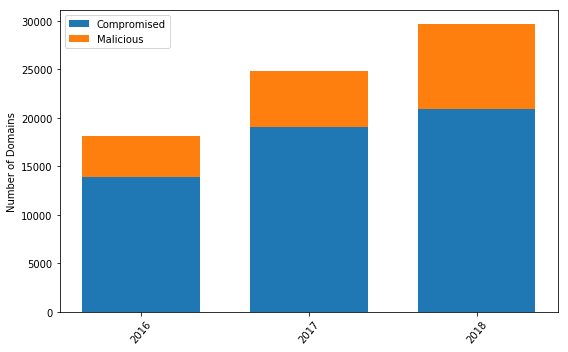

['2016', '2017', '2018']
[0.23419540229885058, 0.23203194321206744, 0.2945603023554026]
[0.7658045977011494, 0.7679680567879326, 0.7054396976445975]


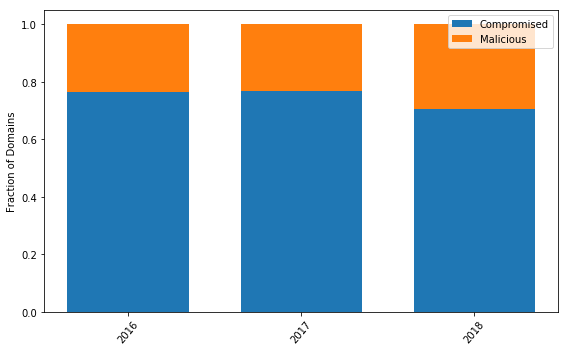

In [25]:
domainClassifPerc(yearly_bins, 'Yearly Domain Classification', 'Number of Domains', fraction=False)
domainClassifPerc(yearly_bins, 'Yearly Domain Classification', 'Fraction of Domains')

#### Quarterly

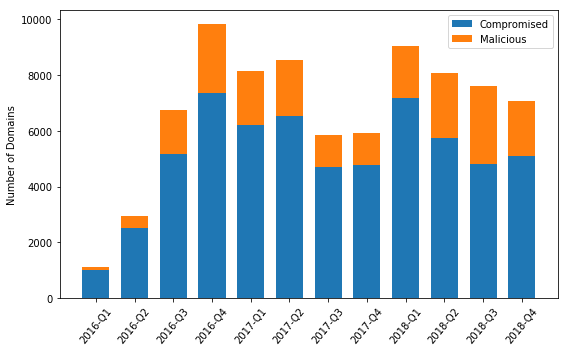

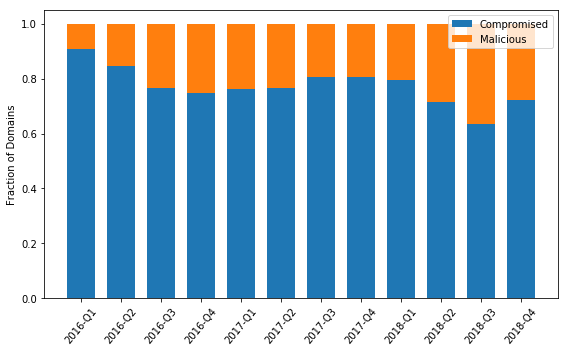

In [23]:
domainClassifPerc(quarterly_bins, 'Quarterly Domain Classification', 'Number of Domains', fraction=False)
domainClassifPerc(quarterly_bins, 'Quarterly Domain Classification', 'Fraction of Domains')

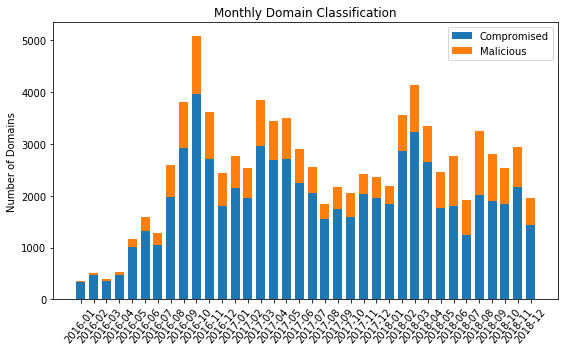

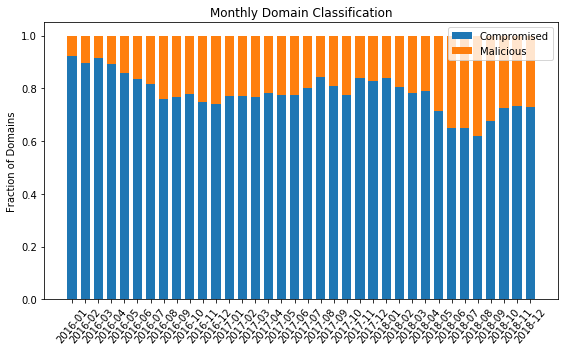

In [20]:
domainClassifPerc(monthly_bins, 'Monthly Domain Classification', 'Number of Domains', fraction=False)
domainClassifPerc(monthly_bins, 'Monthly Domain Classification', 'Fraction of Domains')

# Compromised URLs

In [31]:
comp_domains = set([data_db[i]['info'][0] for i, prob in enumerate(ydb_proba[:,1]) if prob > 0.7])
print(len(comp_domains))

36492


In [43]:
comp_urls = []
comp_urls_set = set()
with open("./data/urlinfo_2019-01-21", "r", encoding='utf-8') as f:
    urlinfo = eval(f.read())
    
    for info in urlinfo:
        path_id = info[0]
        urls = []
        urls.append(info[1])
        urls.append(info[2])
        timestamp = info[3]
        
        firstfinal = None
        for i, url in enumerate(urls):                
            if url:
                if not url.endswith('/'):
                    url+='/'
                ext = tldextract.extract(url)
                if ext and ext.domain and ext.suffix:
                    domain = '.'.join([ext.domain, ext.suffix])
                    if domain in comp_domains:
                        if i==0:
                            firstfinal = 'first'
                        elif i==1:
                            if firstfinal:
                                firstfinal = 'both'
                            else:
                                firstfinal = 'final'
        
        if firstfinal:
            comp_urls.append(info+[firstfinal])

In [44]:
print(len(comp_urls))

100325


In [45]:
with open("./data/compurls_2019-01-21", "w", encoding='utf-8') as f:
    pprint(comp_urls, f)